In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

In [2]:
file_cov = '/home/hhg/Research/emu_Nx2pt/data/cov_romanxso'

df = pd.read_csv(file_cov, header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2925,2925,22.5449,22.54490,-1,-1,-1,-1,1.135687e-15,1.214547e-19
1,2925,2926,22.5449,28.64739,-1,-1,-1,-1,0.000000e+00,1.377199e-19
2,2925,2927,22.5449,36.40171,-1,-1,-1,-1,0.000000e+00,1.315260e-19
3,2925,2928,22.5449,46.25499,-1,-1,-1,-1,0.000000e+00,1.131113e-19
4,2925,2929,22.5449,58.77536,-1,-1,-1,-1,0.000000e+00,9.183158e-20


In [3]:
# rename important col names
df.rename(columns={df.columns[8]: 'G'    ,  # Gaussian Part
                   df.columns[9]: 'NG'   ,  # Non-Gaussian Part : cNG+SSC
                   df.columns[0]: 'rowID',
                   df.columns[1]: 'colID'}, inplace=True) 
df.head()

,rowID,colID,2,3,4,5,6,7,G,NG
0,2925,2925,22.5449,22.54490,-1,-1,-1,-1,1.135687e-15,1.214547e-19
1,2925,2926,22.5449,28.64739,-1,-1,-1,-1,0.000000e+00,1.377199e-19
2,2925,2927,22.5449,36.40171,-1,-1,-1,-1,0.000000e+00,1.315260e-19
3,2925,2928,22.5449,46.25499,-1,-1,-1,-1,0.000000e+00,1.131113e-19
4,2925,2929,22.5449,58.77536,-1,-1,-1,-1,0.000000e+00,9.183158e-20


In [4]:
cov_full = np.zeros((3500, 3500))

In [5]:
for rowID, colID, G, NG in zip(df.rowID, df.colID, df.G, df.NG):
    cov_full[rowID, colID] = G+NG
    cov_full[colID, rowID] = cov_full[rowID, colID]

In [6]:
err = np.sqrt(np.diag(cov_full))
corr_full = cov_full/np.outer(err, err)

In [7]:
print(corr_full.min(), corr_full.max())

-0.005082221978963666 1.0000000000000002


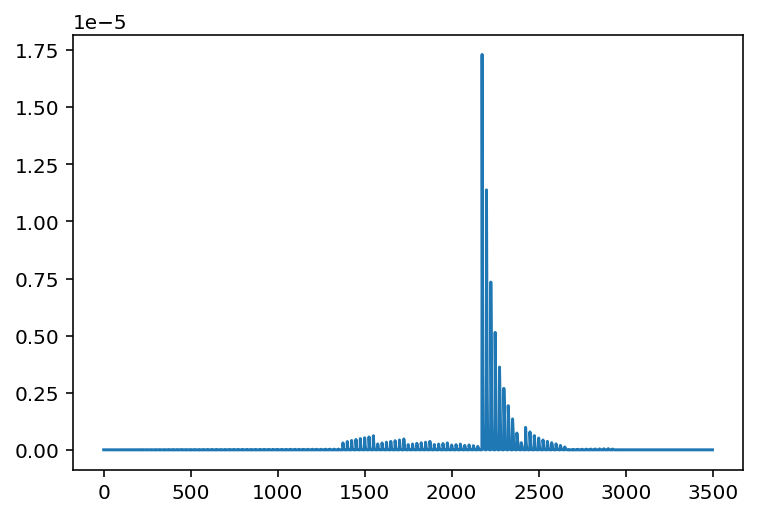

In [8]:
plt.plot(err)

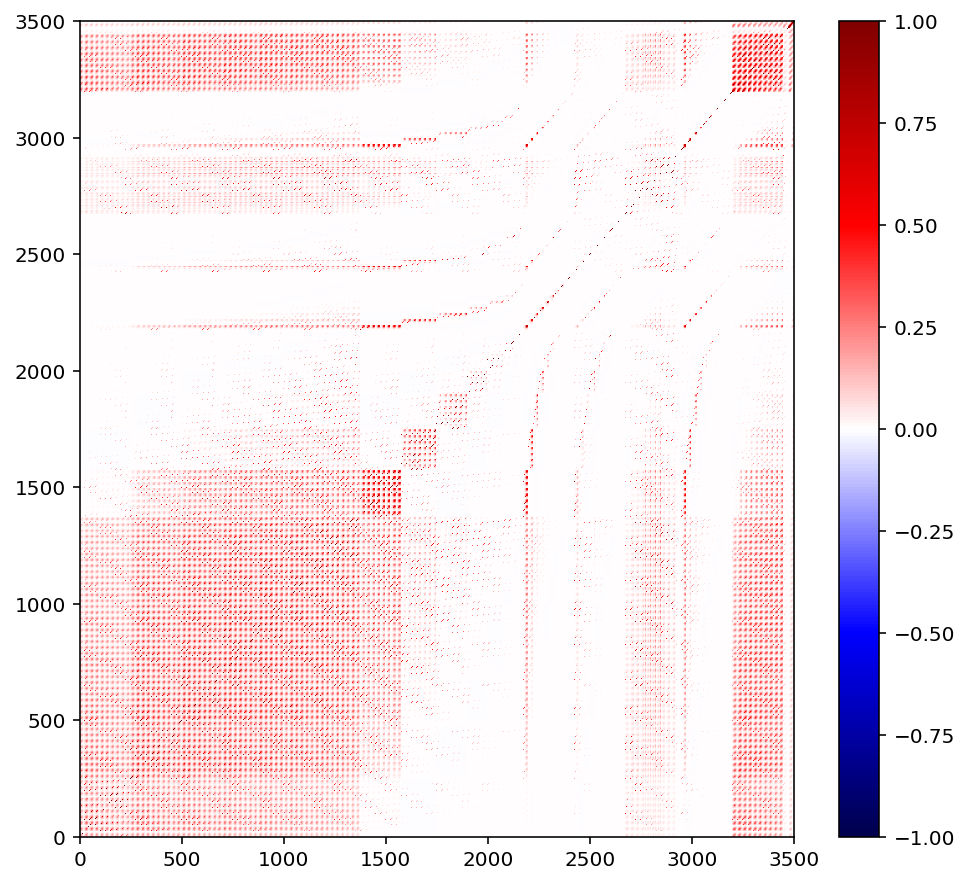

In [9]:
plt.figure(figsize=(8, 7.5))
plt.pcolor(corr_full, vmax=1, vmin=-1, cmap='seismic')
plt.colorbar()

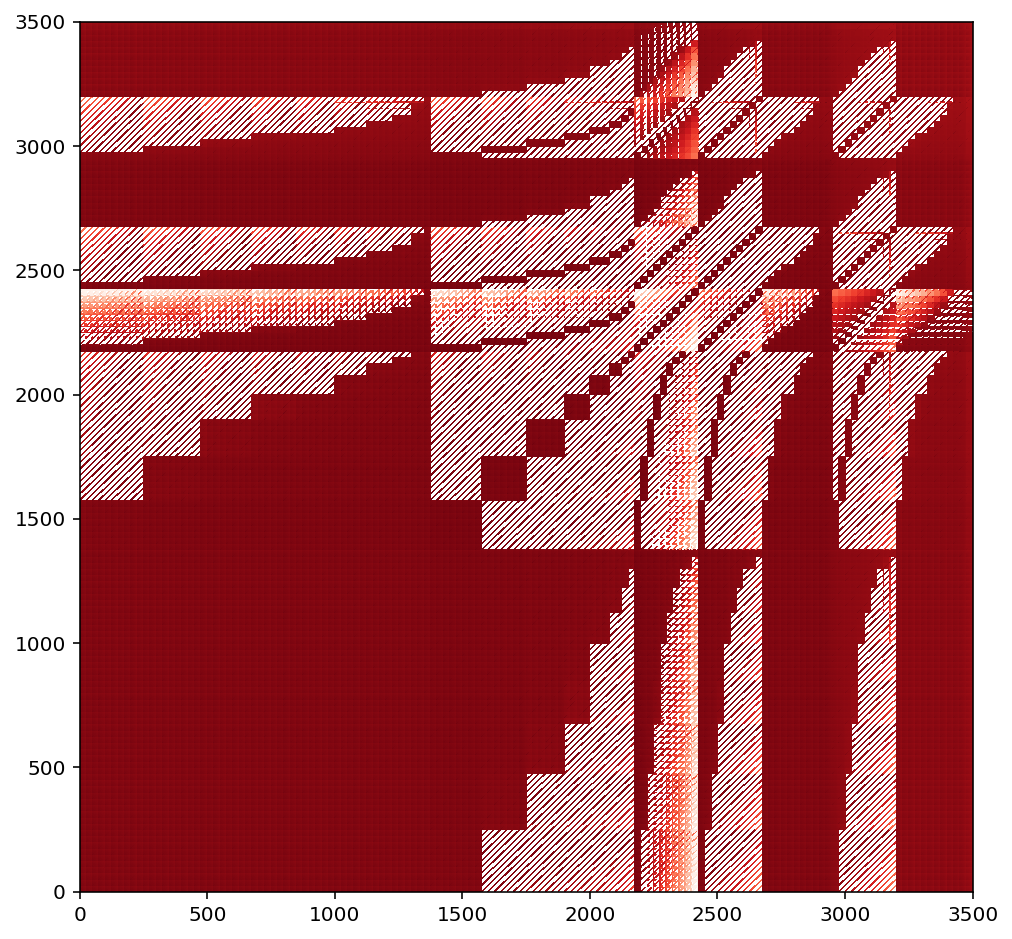

In [10]:
plt.figure(figsize=(8, 8))
plt.pcolor(cov_full, norm=LogNorm(), cmap='Reds')

In [11]:
import pickle

data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+'cov3500.pkl'

with open(filename, 'wb') as handle:
    pickle.dump(cov_full, handle)